In [1]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Q1
### a. Determine the df for treatment

In [2]:
MS_treatments = 25
SS_treatments = 75
SS_total = 135
df_total = 19

$$
df_{treatment} = \alpha - 1 = \frac{SS_{treatment}}{MS_{treatment}} = \frac{75}{25} = 3
$$

### b. Determine the df for error

$$
\alpha = 4 \\
df_{total} = \alpha*n - 1 = 19 => \alpha * n = 20 \\ n = \frac{20}{4} = 5 \\ 
df_{error} = \alpha*n-\alpha = 4*5-4 = 16 
$$

### c. Determine the SS for error

$$
SS_{total} - SS_{treatment} = SS_{error} \\
135 - 75 = 60
$$

### d. Determine the MS for error

$$
MS_{error} = \frac{SS_{error}}{df_{error}} = \frac{60}{16} = 3.75 
$$

### e. Determine the F-statistic


$$
F_0 = \frac{MS_{treatment}}{MS_{error}} = \frac{25}{3.75} = 6.66
$$

### f. Use the rejection region method (find the critical value) to test the hypothesis of equal means (give decision and conclusion). 

In [10]:
stats.f.ppf(.95,3,16)

3.238871517453585

since $F_0$ = 6.67 is greater than 3.24 which is the critical value for the given (alpha = .05) significance level we can cocnlude it is in the rejection area and we can reject the Null hypothesis and we can say there is significant evidance that at least one group mean is different with one another in other words this suggests that there is significant evidence at the 0.05 level to conclude that the means are not all equal.

In [9]:
from scipy.stats import f

# Given data
MS_treatments = 25
SS_treatments = 75
SS_total = 135
df_total = 19

# Degrees of freedom for treatments and error
df_treatments = 3   # treatments df = total df - 1
df_error = 16 # error df = SS_total - df_treatments - 1

# Calculating F-statistic
F_statistic = (SS_treatments / df_treatments) / (SS / df_error)

# Finding the critical value for F at the 0.05 significance level
alpha = 0.05
F_critical = f.ppf(1 - alpha, df_treatments, df_error)

F_statistic, F_critical


(16.0, 3.238871517453585)

In [7]:
df_treatments

18

# Q2
## The data in the excel file provided show the measurements of hemoglobin (g per 100 ml) in the blood of brown trout. The trout were placed at random in four different troughs. The fish food added to the troughs contained, respectively, 0, 5, 10, and 15 grams of sulfamerazine per 100 pounds of fish. The measurements were made on 10 fish randomly selected from each trough after 35 days.
### a. Create a plot of the data and comment, does it look like hemoglobin is different based on sulfamerazine level?


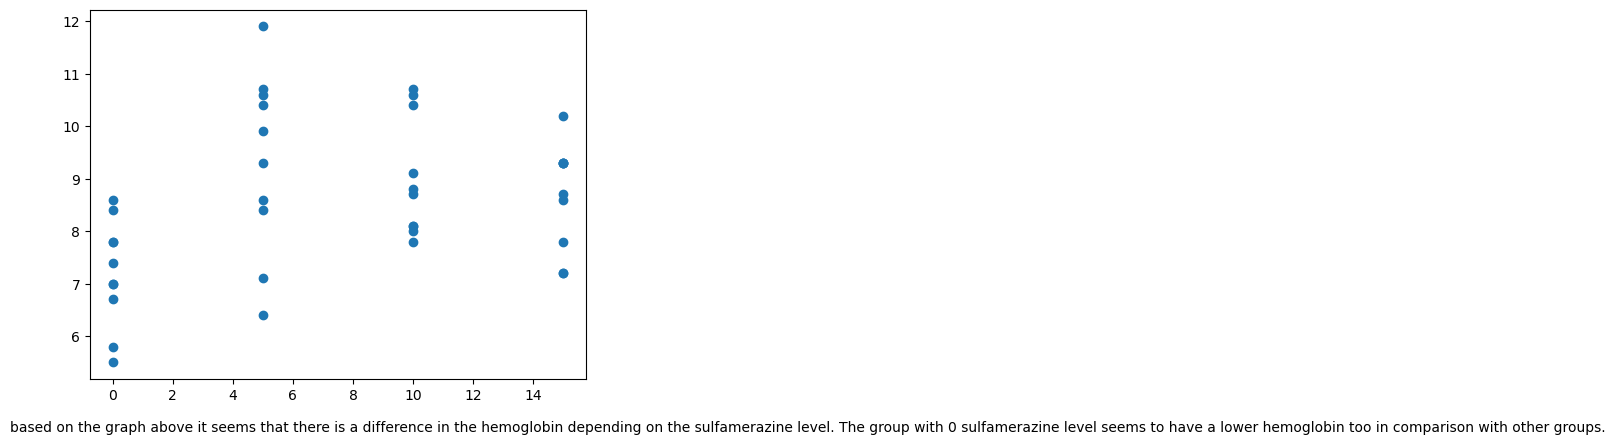

In [44]:
df = pd.read_excel("HW10 Datasets.xlsx",sheet_name="Brown Trout")
plt.scatter(df['Sulfamerazine (g)'],df['Hemoglobin (g per 100 mL)'])
plt.figtext(0,0,"based on the graph above it seems that there is a difference in the hemoglobin depending on the sulfamerazine level. The group with 0 sulfamerazine level seems to have a lower hemoglobin too in comparison with other groups.")
plt.show()

### b. Write down the null and alternative hypothesis for the test to see if there are any differences in mean hemoglobin among the different amounts of sulfamerazine added.


$H_0 = $ there is no significant difference in the hemoglobin among the four groups with different sulfamerazine.

$H_0 = \mu_1 = \mu_2 = \mu_3 = \mu_4$

$H_a = $  there is a significant difference in at least one group hemoglobin with others.

$H_a = not \ all\ \mu_i \ are \ equal.$

### c. Test this hypothesis using an ANOVA and α=0.05 and draw conclusions (provide ANOVA, decision, and conclusion).


In [46]:
Factor = 'Sulfamerazine (g)'
Parameter = "Hemoglobin (g per 100 mL)"

groups = []
for i in range(len(set(df[Factor]))):
    groups.append(np.array(df.loc[df[Factor] == df[Factor].unique()[i]][Parameter]))
    
stats.f_oneway(*groups)

F_onewayResult(statistic=5.695542845000089, pvalue=0.002684746458190964)

Since p_value is .0027 which is way less than .05 the significance level we can reject the $H_0$ and we can assume there is a significant difference in the  hemoglobin content between at least two of the aforementioned groups. 

### d. Did the outcome match what you thought would happen based on your plot, explain 

Yes,

both based on the graph and the p_value calculated above we can see there is a significant difference between samples from various level of sulfamerazine groups which yield the hemoglobin content is efectivly affected by the level of sulfamerazine.

# Q3
## Six observations of each of four types of cereal grain grown in a certain region were analyzed to determine thiamin content. The data (ug/g) is provided in the excel file.
### a. Create a plot of the data and comment, does it look like thiamin is different based on cereal grain?

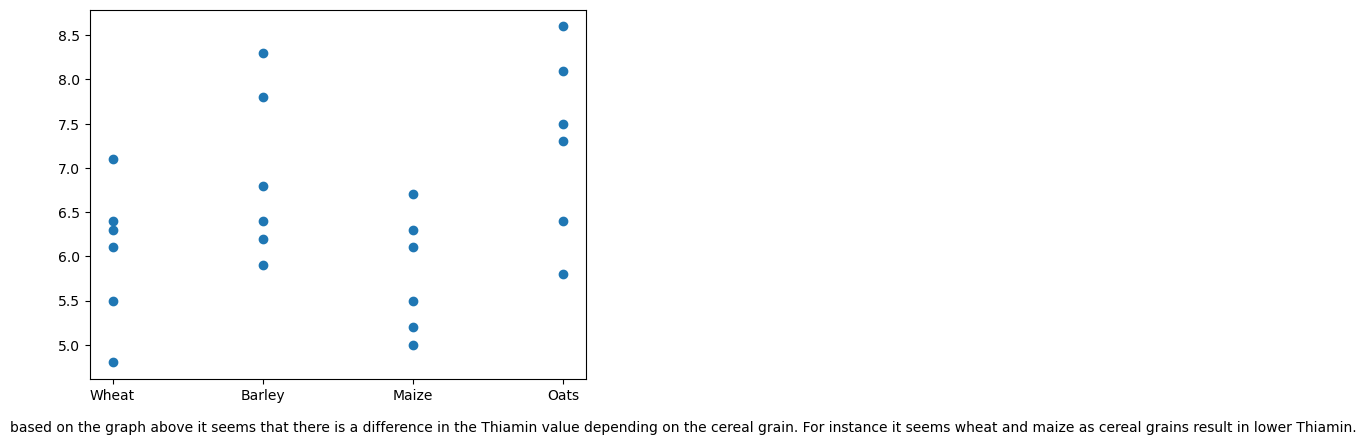

In [40]:
df = pd.read_excel("HW10 Datasets.xlsx",sheet_name="Cereal Grain")
plt.scatter(df['Cereal Grain'],df['Thiamin (ug/g)'])
plt.figtext(0,0,"based on the graph above it seems that there is a difference in the Thiamin value depending on the cereal grain. For instance it seems wheat and maize as cereal grains result in lower Thiamin.")
plt.show()

### b. Write down the null and alternative hypothesis for the test to see if there are any differences in mean thiamin content among the different types of grains.


$H_0 = $ there is no significant difference in the thiamin content among the four types of cereal grains.

$H_0 = \mu_1 = \mu_2 = \mu_3 = \mu_4$

$H_a = $  there is a significant difference in the thiamin content between at least two of the cereal grain types.

$H_a = not \ all\ \mu_i \ are \ equal.$

### c. Test this hypothesis using an ANOVA and α=0.05 and draw conclusions (provide ANOVA, decision, and conclusion).


In [41]:
Factor = 'Cereal Grain'
Parameter = "Thiamin (ug/g)"

groups = []
for i in range(len(set(df[Factor]))):
    groups.append(np.array(df.loc[df[Factor] == df[Factor].unique()[i]][Parameter]))
    
stats.f_oneway(*groups)

F_onewayResult(statistic=3.8622125656346205, pvalue=0.024922401560605326)

Since p_value is .025 which is less than .05 the significance level we can reject the $H_0$ and we can assume there is a significant difference in the thiamin content between at least two of the cereal grain types. 

### d. Did the outcome match what you thought would happen based on your plot, explain.

Yes,

both based on the graph and the p_value calculated above we can see there is a significant difference between samples from various cereal grains which yield the cerial grain haa an important role in the content of Thiamin in the cereal.

# Q4
### An experiment was perform to investigate popcorn yield. Two factors were involved, the type of popcorn (gourmet or plain) and the size of the batch (small and large). The response was yield.
### a. Run the full two-factor ANOVA. Which effects are significant?


In [14]:
df = pd.read_excel("HW10 Datasets.xlsx",sheet_name="Popcorn")

In [15]:
df.rename(columns={"yield":"yield_value"},inplace=True)  
Factor1 = "popcorn"
Factor2 = "batch"
Parameter = "yield_value"

model = ols(f'{Parameter} ~ C({Factor1}) + C({Factor2}) + C({Factor1}):C({Factor2})', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

anova_results

,sum_sq,df,F,PR(>F)
C(popcorn),82.083600,1.0,36.836802,5.591188e-05
C(batch),344.844900,1.0,154.756655,3.233998e-08
C(popcorn):C(batch),50.481025,1.0,22.654459,4.643859e-04
Residual,26.739650,12.0,NaN,NaN


### b. Give an interpretation of the interaction effect.


#### Since the P_value for the first factor(popcorn) is very small (way less than the .05) we can conclude that yield is statistically dependent on the popcorn type

#### Since the P_value for the second factor(batch) is very small (way less than the .05) we can conclude that yield is statistically dependent on the batch size too.

#### Finally since the P value for the interaction between popcorn type and batch size is also significantly less than 0.05. This indicates that there is a statistically significant interaction effect between the popcorn type and the batch size on the yield.

### c. Identify the conditions that give the best outcome (highest yield) based on your analysis. Provide a graphic that help convey the results. 

<Figure size 1000x600 with 0 Axes>

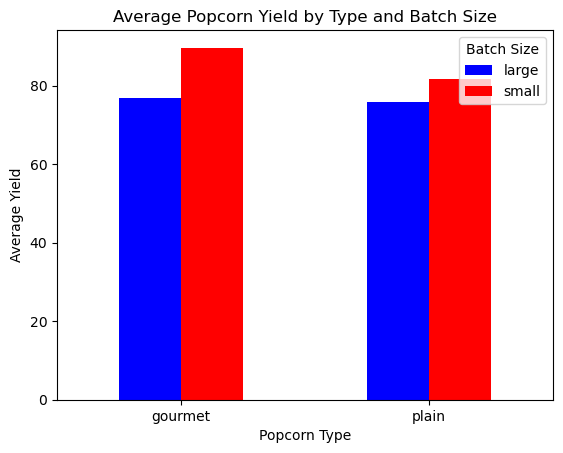

In [17]:
pivot_df = df.pivot_table(values='yield_value', index='popcorn', columns='batch', aggfunc='mean')

# Plotting
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', color=['blue', 'red'])

plt.title('Average Popcorn Yield by Type and Batch Size')
plt.xlabel('Popcorn Type')
plt.ylabel('Average Yield')
plt.xticks(rotation=0)
plt.legend(title='Batch Size', loc='upper right')
plt.show()


For small batches, the yield is significantly higher with gourmet popcorn compared to plain popcorn.
In contrast, for large batches, the difference in yield between gourmet and plain popcorn is less pronounced.
Thus, the best condition for achieving the highest yield, based on this analysis, appears to be using gourmet popcorn in small batches. This combination resulted in the highest yield values in the experiment